## Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mode
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

## Load dataset

In [4]:
df = pd.read_csv("/home/divyasale/Downloads/Disease_Prediction.csv")

## Data Preprocessing

In [5]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
#Drop Null Column
df=df.dropna(axis=1)

In [7]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
df.size

654360

In [9]:
df.shape

(4920, 133)

In [10]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [11]:
# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

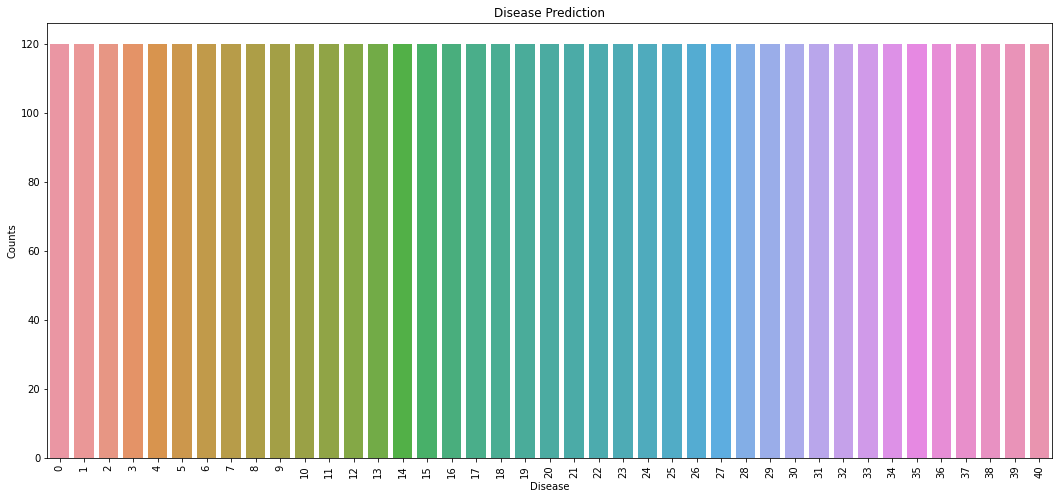

In [12]:
#Lets see data is Balanced or not
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.title("Disease Prediction")
plt.xticks(rotation=90)
plt.show()

## Divide Data

In [13]:
X = df.iloc[:,:-1]
y= df.iloc[:, -1]

In [14]:
#Divide data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
print(df.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4920, 133)
(3936, 132)
(3936,)
(984, 132)
(984,)


## Build SVM Model

In [16]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [17]:
y_pred = svm_model.predict(X_test)

In [18]:
y_pred

array([ 7, 27, 28, 34, 11, 14, 28, 35, 16, 36, 29, 24, 29, 22, 37,  6,  9,
       21,  4, 27, 17, 27, 36, 24, 33,  7, 26, 17,  8, 10, 26, 13, 16,  0,
       30,  3, 33, 19, 27, 24, 21, 18,  5,  2,  2, 27, 16, 35,  8, 17, 38,
        2, 32,  9, 36,  4, 28, 18, 28, 12, 22, 30, 36, 26, 23,  7, 37, 23,
       30, 27, 10, 24, 32, 35, 10,  1, 35, 30, 29, 18, 24, 11,  7, 23, 39,
       30,  8, 22, 18, 19,  5, 23, 40,  4,  7, 21, 16, 30, 35, 29, 27, 21,
       25, 35, 30,  3,  7, 13, 35, 16,  0, 37,  0, 34, 15, 36,  7,  5,  5,
       31, 37, 27, 37, 27, 35, 27, 26, 37, 27, 28, 34, 20, 29,  3, 31, 31,
        2, 39,  7, 40, 18, 36, 17, 26, 17, 18, 24, 26, 10, 26,  8, 32, 31,
       10, 39, 20,  1,  2, 12, 27,  9, 17, 25, 37, 33, 20, 16, 32,  5, 16,
       40,  0,  0, 31, 26, 19, 12, 14, 19, 25,  5, 17, 10,  9,  0, 17, 36,
       27, 12,  1,  9, 12, 35,  7, 18, 18, 40,  4, 39, 29,  5, 35, 30, 20,
       15, 17, 24,  5, 15, 16, 12, 37,  6,  9,  9,  6,  8, 36, 21, 17, 30,
       23, 38,  4, 21, 25

## Evaluate the Model

In [19]:
#Accuracy Score
print("SVM_Model accuracy:",metrics.accuracy_score(y_pred,y_test))

SVM_Model accuracy: 1.0


In [20]:
#Precision Score
print("SVM_Model precision:",metrics.precision_score(y_pred,y_test,average='micro'))

SVM_Model precision: 1.0


In [21]:
#Recall Score
print("SVM_Model recall:",metrics.recall_score(y_pred,y_test,average='micro'))

SVM_Model recall: 1.0


In [22]:
final_preds = [mode([i])[0][0] for i in zip(y_pred)]

In [23]:
symptoms = X.columns.values
# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
 
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [24]:
# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
     
    # generating individual outputs
    svm_prediction = data_dict["predictions_classes"][svm_model.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([svm_prediction])[0][0]
    predictions = {
        
        "final_prediction":final_prediction
    }
    return predictions


In [25]:
# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions,Dischromic  Patches"))

{'final_prediction': 'Fungal infection'}


In [26]:
print(predictDisease("Stomach Pain,Acidity,Ulcers On Tongue,Vomiting"))

{'final_prediction': 'GERD'}
